# ML Challenge 

<img src="https://imageio.forbes.com/specials-images/imageserve/5ecd179f798e4c00060d2c7c/0x0.jpg?format=jpg&height=600&width=1200&fit=bounds" width="500" height="300">

In the bustling city of Financia, the Central Lending Institution (CLI) is the largest provider of loans to individuals and businesses. With a mission to support economic growth and financial stability, CLI processes thousands of loan applications every month. However, the traditional manual review process is time-consuming and prone to human error, leading to delays and inconsistencies in loan approvals.
To address these challenges, CLI has decided to leverage the power of machine learning to streamline their loan approval process. They have compiled a comprehensive dataset containing historical loan application records, including various factors such as credit scores, income levels, employment status, loan terms(measured in years), loan amounts, asset values, and the final loan status (approved or denied).


**Your task is to develop a predictive model that can accurately determine the likelihood of loan approval based on the provided features. By doing so, you will help CLI make faster, more accurate, and fairer lending decisions, ultimately contributing to the financial well-being of the community.**

It is recommended that you follow the typical machine learning workflow, though you are not required to strictly follow each steps: 
1. Data Collection: Gather the data you need for your model. (Already done for you)

2. Data Preprocessing: Clean and prepare the data for analysis. (Already done for you)

3. Exploratory Data Analysis (EDA): Understand the data and its patterns. (Partially done for you)

4. Feature Engineering: Create new features or modify existing ones to improve model performance. (Partially done for you)

5. Model Selection: Choose the appropriate machine learning algorithm.

6. Model Training: Train the model using the training dataset.

7. Model Evaluation: Evaluate the model's performance using a validation dataset.

8. Model Optimization: Optimize the model's parameters to improve performance.

9. Model Testing: Test the final model on a separate test dataset.

**Please include ALL your work and thought process in this notebook**

In [99]:
# You may include any package you deem fit. We sugggest looking into Scikit-learn
import pandas as pd
import numpy as np

## Dataset


In [100]:
# DO NOT MODIFY
loan_data = pd.read_csv("../../data/loan_approval.csv")

## EDA
Uncomment to see desired output. Add more analysis if you like

loan_id                     0
no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


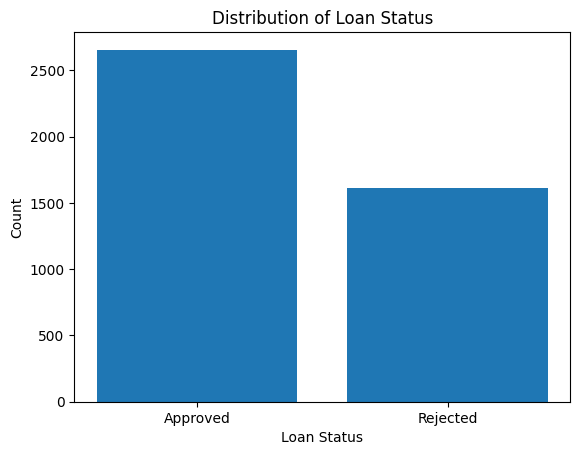

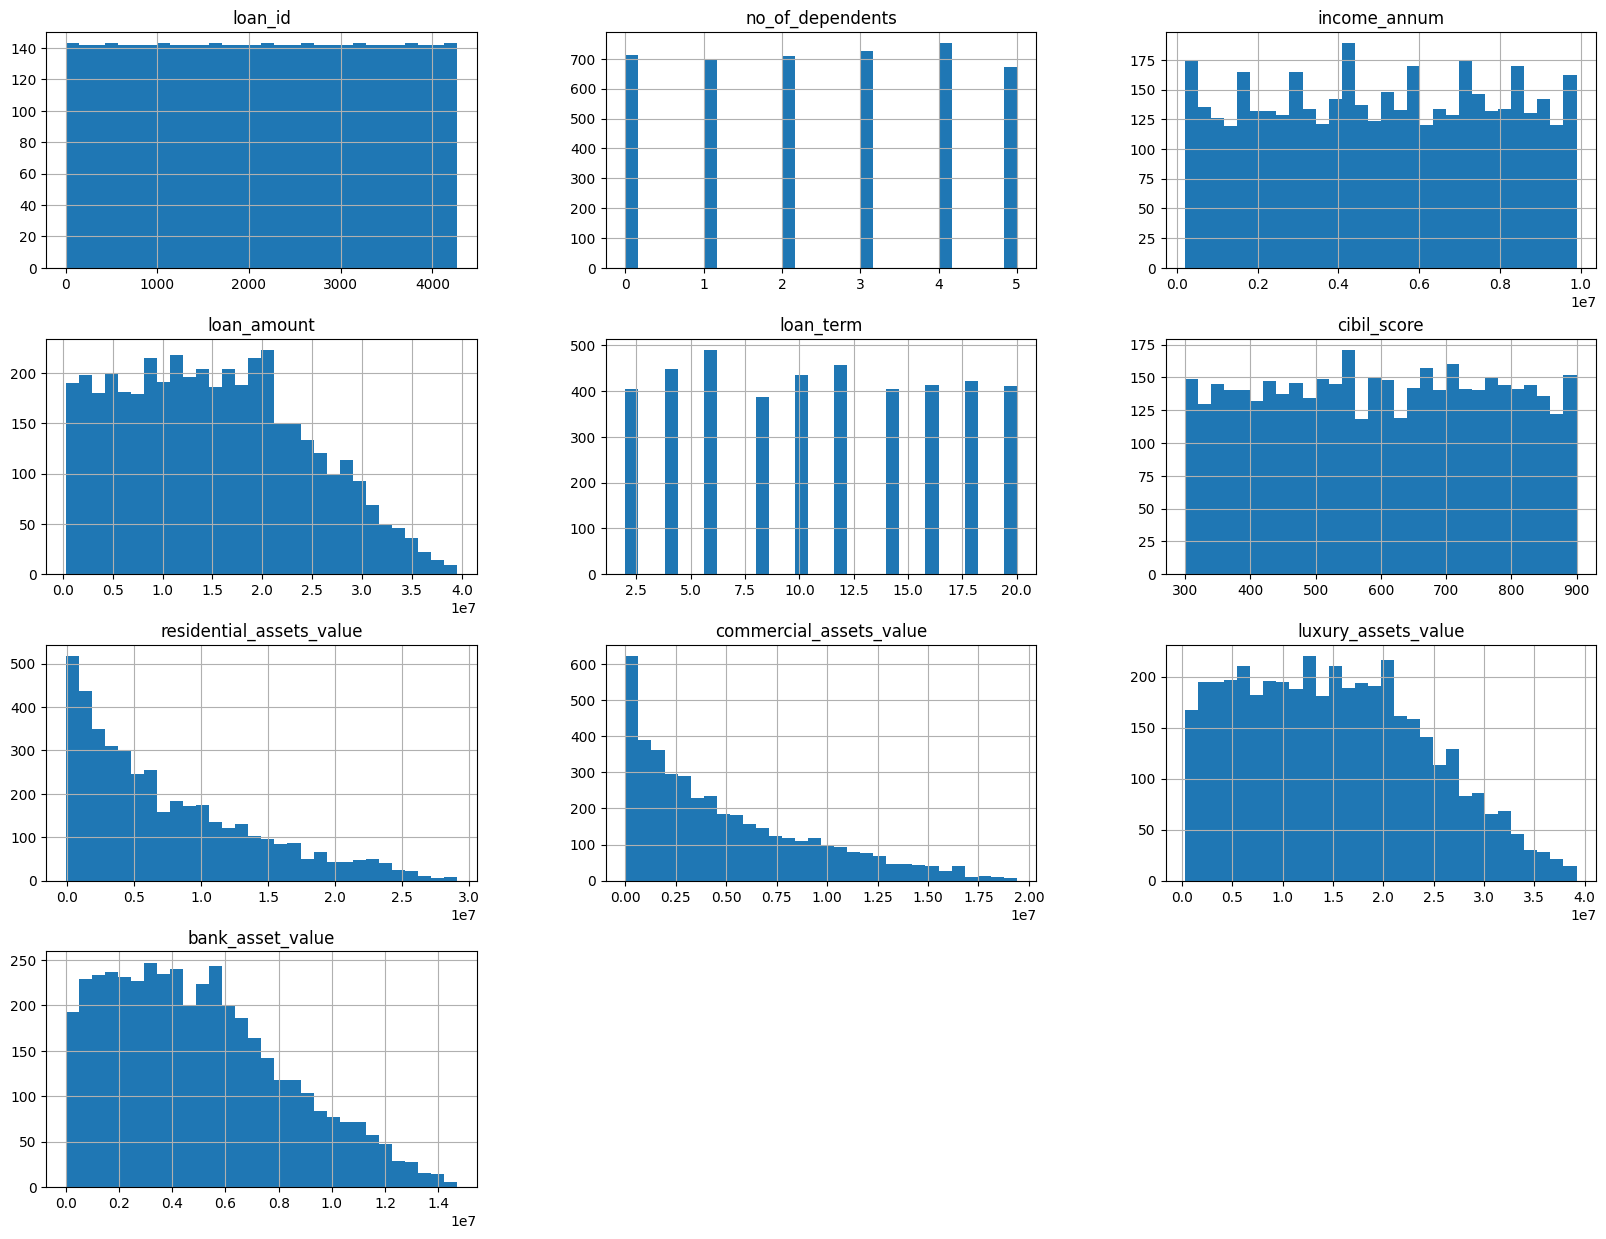

In [101]:

import matplotlib.pyplot as plt

# ------ Display basic information ------
#print(loan_data.columns)
#print(loan_data.describe())

# ------ Check for missing values ------
print(loan_data.isnull().sum()) 

#NO MISSING VALUES

# ------ Visualize the distribution of loan status ------
loan_status_counts = loan_data['loan_status'].value_counts()
plt.bar(loan_status_counts.index, loan_status_counts.values)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')

#~2700 approved, ~1600 declined

# ------ Visualize the distribution of numerical features ------ 
loan_data.hist(bins=30, figsize=(20, 15))

loan_data

# ----- MORE (Encouraged but not required) ------
#MOVED Correlation matrix to below since it needs the binary values to be numbers, not strings

## Feature Engineering

You may want to convert categorical variables to numerical. For example, education takes on the value Graduate and Not Graduate. But we want it to be 0 or 1 for machine learning algorithms to use.

([<matplotlib.axis.YTick at 0x767995a55fd0>,
 [Text(0, 0, 'loan_id'),
  Text(0, 1, 'no_of_dependents'),
  Text(0, 2, 'education'),
  Text(0, 3, 'self_employed'),
  Text(0, 4, 'income_annum'),
  Text(0, 5, 'loan_amount'),
  Text(0, 6, 'loan_term'),
  Text(0, 7, 'cibil_score'),
  Text(0, 8, 'residential_assets_value'),
  Text(0, 9, 'commercial_assets_value'),
  Text(0, 10, 'luxury_assets_value'),
  Text(0, 11, 'bank_asset_value'),
  Text(0, 12, 'loan_status')])

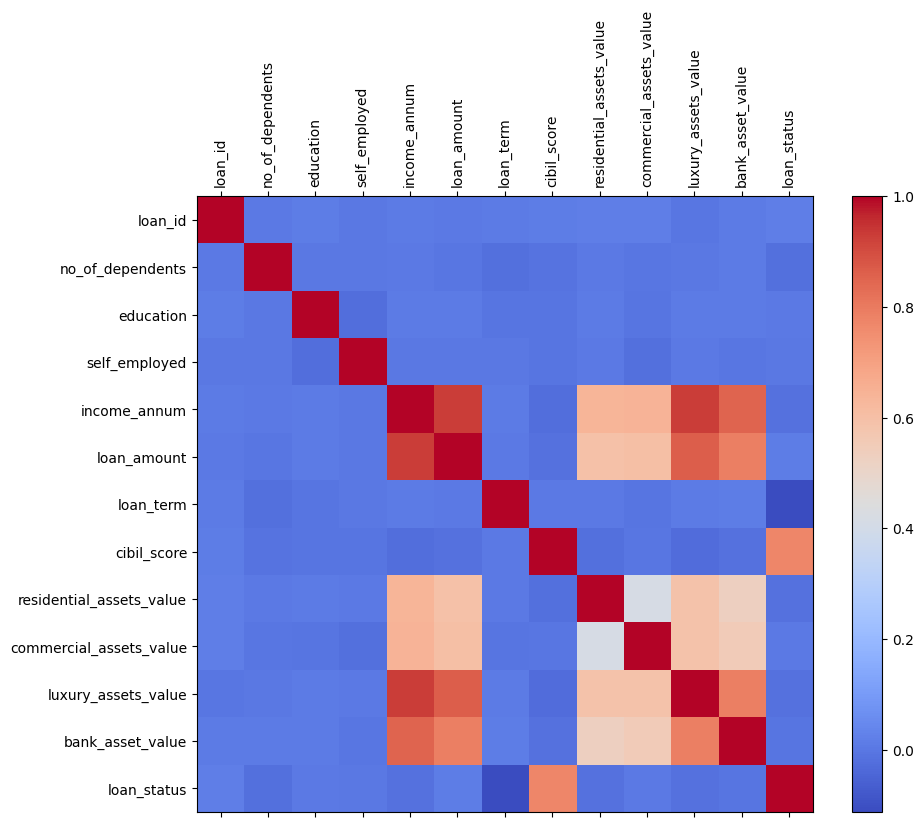

In [102]:
loan_data['education'] = loan_data['education'].map({'Graduate': 1, 'Not Graduate': 0})
# Hint: Other categorical variables are self_employed and loan_status
loan_data['self_employed'] = loan_data['self_employed'].map({'Yes': 1, 'No': 0})
loan_data['loan_status'] = loan_data['loan_status'].map({'Approved': 1, 'Rejected': 0})

# ------ Correlation matrix ------
corr_matrix = loan_data.corr()
fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='coolwarm')
fig.colorbar(cax)
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

## Model Selection

You are free to use any classification machine learning models you like: Logistic Regression, Decision Trees/Random Forests, Support Vector Machines, KNN ... 

In [ ]:
from sklearn.model_selection import train_test_split

# ADDITIONAL METRIC ADDED
loan_data['amount_to_income'] = loan_data['loan_amount'] / loan_data['income_annum']

# Logistic Regression is probably good due to the binary nature of this problem
X = loan_data.drop(['loan_status', 'loan_id'], axis=1)
#[['cibil_score','loan_term', 'income_annum', 'loan_amount']] (not doing this since LASSO is just smarter)
y = loan_data.loc[X.index]['loan_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3) #NO RANDOM state for realism in my eyes

## Model Training and Evaluation

In [104]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
model.fit(X_train, y_train)

,penalty,'l1'
,dual,False
,tol,0.0001
,C,0.1
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'liblinear'
,max_iter,100
,multi_class,'deprecated'


## Model Optimization and Testing

In [105]:
y_pred = model.predict(X_test)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)

print("Train Score: " + str(train_score))
print("Test Score: " + str(test_score))

#The training accuracy is slightly above the test accuracy suggesting a tiny bit of overfit 
# (but it's very tiny in my eyes!)

Train Score: 0.9139892904953146
Test Score: 0.9110070257611241


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(cm)
print(f"True Negatives (Correctly Rejected): {cm[0,0]}")
print(f"False Positives (Wrongly Approved): {cm[0,1]}")
print(f"False Negatives (Wrongly Rejected): {cm[1,0]}")
print(f"True Positives (Correctly Approved): {cm[1,1]}")

#Since training / testing data is similar, we are looking at a model with around 
# 3880+ CORRECT decisions out of 4270 clients!


Confusion Matrix:
[[407  60]
 [ 54 760]]
True Negatives (Correctly Rejected): 407
False Positives (Wrongly Approved): 60
False Negatives (Wrongly Rejected): 54
True Positives (Correctly Approved): 760


*Using a feature importance graph to find which features are most important!*
But it is a little decieving due to some features being a lot BIGGER and thus, their coefficents may be tiny and not show up on the graph.

No easy way to normalize though SINCE you would normalize the test data too which would be bad.
*So, instead I used lasso regression which reveals there are a lot more important features than you may think*

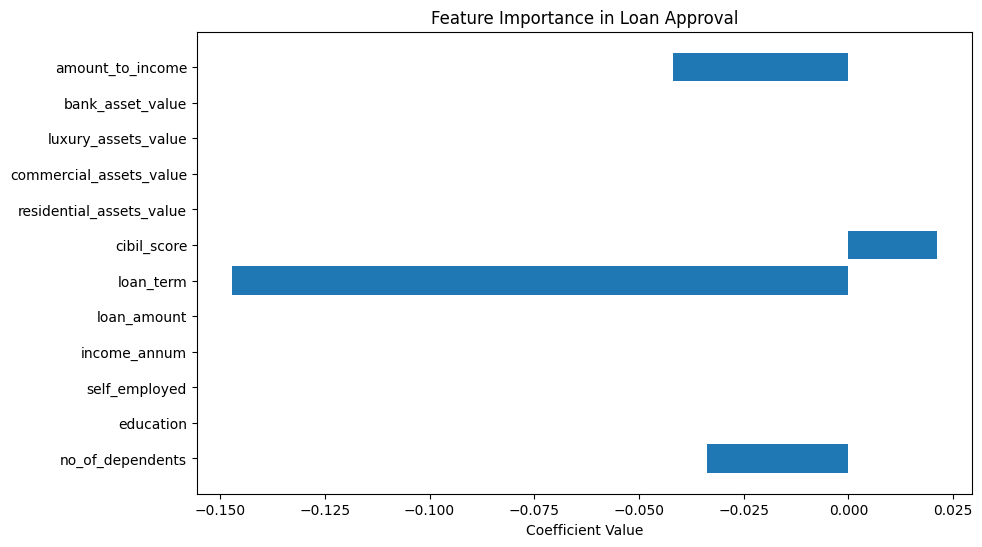

In [107]:
plt.figure(figsize=(10,6))
coefficients = model.coef_[0]
feature_names = X_train.columns
plt.barh(feature_names, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Loan Approval')
plt.show()

## **Conclusion:**
#### We have a made a model for the Central Lending Institution that is over 91% accurate **(3880+ CORRECT decisions out of 4270 clients)** to the way the bank does it and able to adapt a new data, not only based around its training data. The most important factors were the *no_of_dependents, loan_term, cibil_score (credit score), and the new variable I made: loan_amount per annual income*. So it seems at least of half of the factors were not considered too heavily by staff (or maybe the ones I pointed out encompass them...)